# HDF5 Database in pySwap

below is a quick example on how to use the HDF5 database format within the pySWAP. HDF5 (Hierarchical Data Format version 5) is a versatile data model that can represent complex data objects and a wide variety of metadata. It is widely used for storing large amounts of data efficiently and is particularly useful in scientific computing. It can be used for partial retrieval as well, potentially limiting the number of data stored.

In this section we:
- Create and manage HDF5 files with pySwap.
- Store and retrieve data in HDF5 format.


In [1]:
from pyswap import testcase
import pyswap as ps

# get the Model object and run it
model = testcase.get("hupselbrook")
result = model.run("./")

# now, let's create an inteface object and save the model and the result
f = ps.HDF5(filename="data.h5")
f.save_model(model=model, result=result)

Copying linux executable into temporary directory...
Preparing files...
dra file saved.
3 crop file(s) saved.
283.met saved.

 running swap ....
Swap normal completion!

Warnings:


/tmp/ipykernel_5303/2083967308.py:6: Warning: Warning from module Readswap : simulation with additonal Ksat value (Ksatexm)
  result = model.run('./')


## Loading and Modifying Models

Above you can see that the model was saved to the .h5 file. If the file already exists (for example one with your other projects),
you will get a warning message and the program will skip creation of additional elements in the database.

Now we can:
- List the models stored in the HDF5 file.
- Load a specific model from the HDF5 file.
- Create a copy of the loaded model and modify its parameters for another run.

In [2]:
f.list_models

{'pySWAP test - hupselbrook': ['base', 'gwli_up']}

In [3]:
db = f.load("pySWAP test - hupselbrook", load_results=True)

In [4]:
ml2 = db["base"][0].model_copy(deep=True)

In [5]:
# We modify the initial groundwater level:
soil_moisture_alt = ml2.soilmoisture.model_copy(update={"gwli": -74})

In [6]:
# then we ammend the main model object, remembering to change the version name:
ml_gwliup = ml2.model_copy(
    update={"soilmoisture": soil_moisture_alt, "version": "gwli_up"}
)

In [7]:
# And run the model
result2 = ml_gwliup.run("./")

Copying linux executable into temporary directory...
Preparing files...
dra file saved.
3 crop file(s) saved.
283.met saved.

 running swap ....
Swap normal completion!

Warnings:


/tmp/ipykernel_5303/1808759939.py:2: Warning: Warning from module Readswap : simulation with additonal Ksat value (Ksatexm)
  result2 = ml_gwliup.run('./')


In [8]:
# Savin the model version to the database
f.save_model(model=ml_gwliup)

f.list_models

{'pySWAP test - hupselbrook': ['base', 'gwli_up']}

## Visualise the results

Now you can observe the results by plotting the main output pandas.DataFrame object, like you normally would.

<Axes: xlabel='DATETIME'>

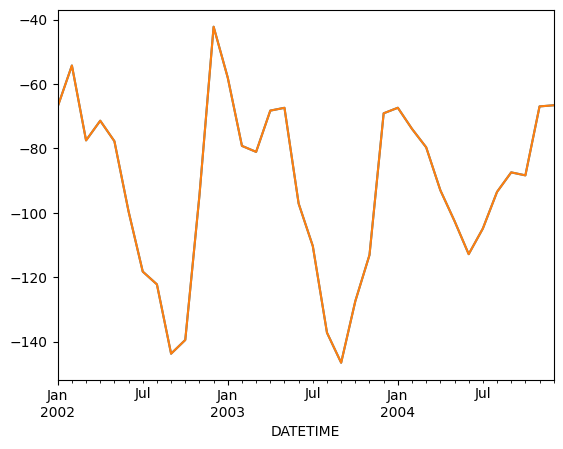

In [ ]:
result2.output["GWL"].plot()